In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from time import time
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas_profiling

In [ ]:
from matplotlib import rcParams
import warnings

warnings.filterwarnings("ignore")

# figure size in inches
rcParams["figure.figsize"] = 10, 6
np.random.seed(42)

In [ ]:
data = pd.read_csv("./data1.csv", sep=',')
data.sample(5)

,Id,VisitorId,ScreenWidth,ScreenOrient,OsName,OsVersion,UserLang,UserDevice,UserBrowser,CpuCores,Class,Step1,Step2,Step3,Step4,Step5,Step6,Step7,Step8,Step9,Step10,Step11,Step12,Step13,Step14,Step15,Step16,Step17,Step18,Step19,Step20,Step21,Step22,Step23,Step24,Step25
70,71,29,414,-1,3,58,1,3,2,0,2,19,14,11,17,37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
457,458,1697,360,1,2,1,1,2,1,8,1,15,28,11,85,17,27,20,21,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
218,219,42,360,1,2,1,1,2,1,8,2,14,10,15,60,15,16,15,19,15,16,19,16,15,0,0,0,0,0,0,0,0,0,0,0,0
250,251,83,360,1,2,1,1,4,1,8,1,15,10,11,87,25,10,15,10,11,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39,40,29,414,-1,3,58,1,3,2,0,2,68,45,15,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# X = data.drop(["Class", "Id", "CpuCores", "ScreenOrient", "OsName", "Step20", "Step21", "Step22", "Step23", "Step24", "Step25", "UserLang"], axis=1)
X = data.drop(["Class", "Id"], axis=1)
y = data["Class"]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.20, random_state=42)
y_test

253    2
199    2
525    2
213    2
395    2
      ..
649    1
421    2
666    2
401    2
423    2
Name: Class, Length: 181, dtype: int64

In [ ]:
# create the classifier
classifier = RandomForestClassifier(n_estimators=200, max_depth=50)

# Train the model using the training sets
t0 = time()
classifier.fit(X_train, y_train)
# predictin on the test set
y_pred = classifier.predict(X_test)
print("Time: ", time() - t0)

Time:  0.4500105381011963


In [ ]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

report = classification_report(y_test, y_pred, target_names=['Non-churned', 'Churned'])
print(report)

print(np.mean(cross_val_score(classifier, X_train, y_train, cv=10)))

In [ ]:
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": classifier.feature_importances_}
).sort_values("importance", ascending=False)

feature_importances_df

,feature,importance
9,Step5,0.091582
10,Step6,0.083109
8,Step4,0.075166
7,Step3,0.063760
11,Step7,0.062824
13,Step9,0.061645
12,Step8,0.056217
14,Step10,0.053034
0,VisitorId,0.050666
5,Step1,0.050597


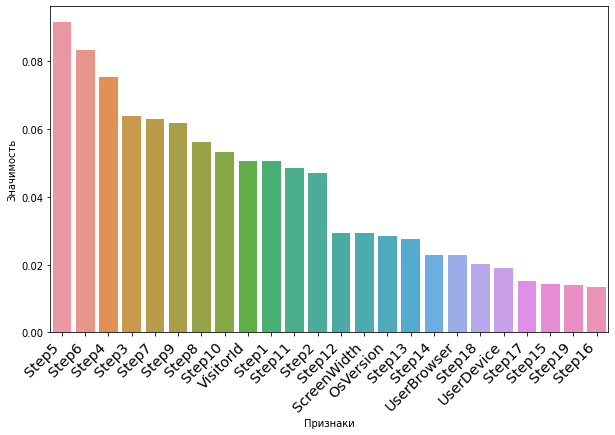

In [ ]:
# visualize important featuers

# Creating a bar plot
sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)
# Add labels to your

plt.xlabel("Признаки")
plt.ylabel("Значимость")

plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()